In [1]:
# classify phase 0, 1, 2, 3, 4 at cardiac action potentials

In [2]:
!pip install pyabf
import pyabf


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
######################### BUILD THE DATASET ############################

In [3]:
# Function to plot phases based on given start and end times
def plot_phases(sweepX, sweepY, phase_times):
    plt.figure(figsize=(15, 6))
    
    # Define colors for each phase
    colors = {
        0: "red",
        1: "orange",
        2: "yellow",
        3: "green",
        4: "blue"
    }
    
    # Plot the original signal
    plt.plot(sweepX, sweepY, label="Original Signal", color='black')
    
    # Plot each phase with a distinct color
    for phase, (start_time, end_time) in enumerate(phase_times):
        phase_indices = np.where((sweepX >= start_time) & (sweepX <= end_time))[0]
        plt.plot(sweepX[phase_indices], sweepY[phase_indices], '.', color=colors[phase], label=f"Phase {phase}")
    
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (pA or mV)")
    plt.title("Action Potential Phases")
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
# define save function

import csv
import os

def save_to_csv(sweepX, sweepY, phase_times, csv_file_path, random_sweep_index):
    # Save phase times and derivatives to CSV
    file_exists = os.path.isfile(csv_file_path)
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(['File Path', 'Phase', 'Start Time (s)', 'End Time (s)', 'X Values', 'Y Values', 'Sweep Index'])
        for phase, (start_time, end_time) in enumerate(phase_times):
            phase_indices = np.where((sweepX >= start_time) & (sweepX <= end_time))[0]
            phase_x_values = sweepX[phase_indices].tolist()
            phase_y_values = sweepY[phase_indices].tolist()
            writer.writerow([file_path, phase, start_time, end_time, phase_x_values, phase_y_values, random_sweep_index])
    
    print(f"Phase times and x,y saved to {csv_file_path}")

In [8]:
!pip install matplotlib
!pip install pandas
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 2.1 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [59]:
# import packages
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# read the file
# Define the path to the Excel file
excel_file_path = "/Users/b/bio/cardiac/Pennsieve-dataset-297-version-1/files/primary/manifest.xlsx"

# Read the Excel file
df = pd.read_excel(excel_file_path)

# Select the "filename" column
filenames = df['filename']

# Choose a random filename
random_filename = random.choice(filenames)

file_path = "/Users/b/bio/cardiac/Pennsieve-dataset-297-version-1/files/primary/" + random_filename
print(f"Randomly chosen filename: {random_filename}")

# Load the ABF file
abf = pyabf.ABF(file_path)

# Get the total number of sweeps
sweep_count = abf.sweepCount

# Choose a random sweep index
random_sweep_index = random.randint(0, sweep_count - 1)
print(f"Randomly chosen sweep index: {random_sweep_index}")

Randomly chosen filename: sub-10-28-2019/sam-2019-10-28-0004-CF/2019_10_28_0004_CF.abf
Randomly chosen sweep index: 69


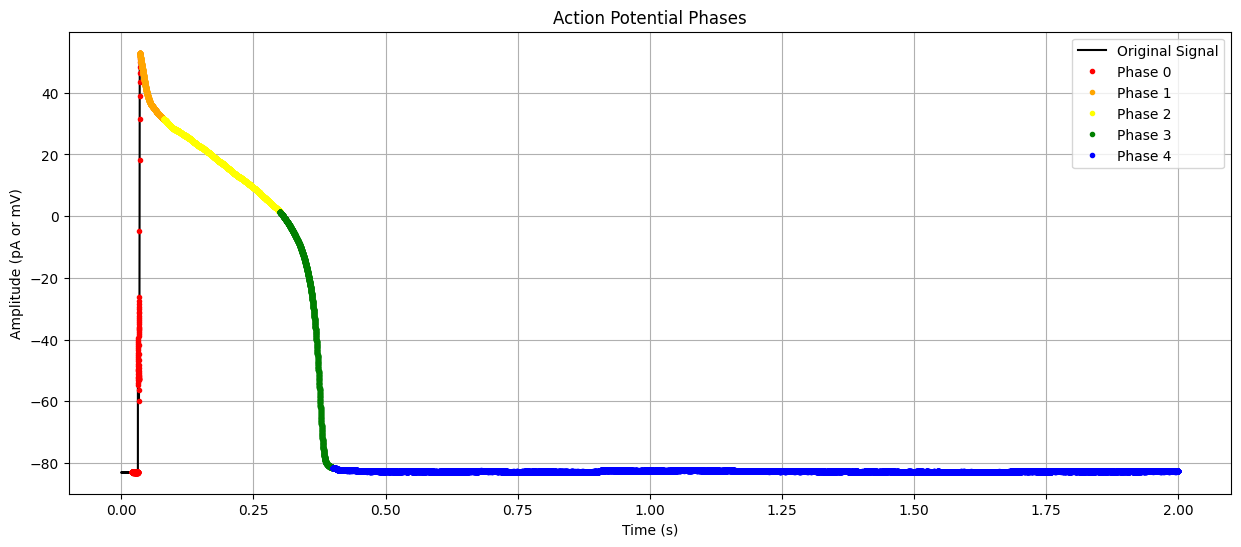

In [69]:
##### Analyze and get the sweep data
abf.setSweep(random_sweep_index)
sweepX = abf.sweepX
sweepY = abf.sweepY


# Define the phase times (start_time, end_time) for each phase
phase_times = [
    (0.02, 0.035),  # Phase 0
    (0.035, 0.08),  # Phase 1
    (0.08, 0.30),  # Phase 2
    (0.30, 0.40),  # Phase 3
    (0.40, 2.0)   # Phase 4
]

# Plot the phases
plot_phases(sweepX, sweepY, phase_times)

In [70]:
# Define the CSV file path to save the phase times
csv_file_path = "/Users/b/bio/cardiac/model1/phases.csv"

#save to CSV
save_to_csv(sweepX, sweepY, phase_times, csv_file_path, random_sweep_index)



Phase times and x,y saved to /Users/b/bio/cardiac/model1/phases.csv


In [579]:
# train the classifier

In [ ]:
# the classifier will read in a sweep and output the domain for each of the phases. 
# train a single classifier to output the phases

In [27]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 802.1 kB/s eta 0:00:00 0:00:01
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 37.8 MB/s eta 0:00:0000:010:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 48.9 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv('/Users/b/bio/cardiac/model1/phases.csv')


In [2]:
import ast

def get_phase_data(df, index):
    """
    Converts string representations of x and y values at a given index in the DataFrame
    into a list of (x, y) tuples.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    index (int): The index of the data to extract.

    Returns:
    list: A list of (x, y) tuples.
    """
    phase_x = ast.literal_eval(df['X Values'][index])
    phase_y = ast.literal_eval(df['Y Values'][index])
    phase_data = list(zip(phase_x, phase_y))
    return phase_data

In [4]:
import pyabf

dataset = {}

# read file, sweep number, phase number
index = 0
file = df['File Path'][index]
sweepNum = df['Sweep Number'][index]
phaseNum = df['Phase'][index]
abf = pyabf.ABF(file)
abf.setSweep(sweepNum)

# Extract sweepX and sweepY
sweepX = abf.sweepX
sweepY = abf.sweepY

# Create a list of tuples (x, y)
totalSweep = list(zip(sweepX, sweepY))

phase0 = get_phase_data(df, index)
phase1 = get_phase_data(df, index + 1)
phase2 = get_phase_data(df, index + 2)
phase3 = get_phase_data(df, index + 3)
phase4 = get_phase_data(df, index + 4)

dataset[str(totalSweep)] = [phase0[0], phase1[0], phase2[0], phase3[0], phase4[0], phase4[-1]]

index+=5





In [5]:
[phase0[0], phase1[0], phase2[0], phase3[0], phase4[0], phase4[-1]]

[(0.025, -82.122802734375),
 (0.035, 54.01611328125),
 (0.1, 37.200927734375),
 (0.3, 9.613037109375),
 (0.45, -79.071044921875),
 (1.9999, -82.51953125)]

In [6]:
dataset = {}
index = 0
while index < len(df):
    file = df['File Path'][index]
    sweepNum = df['Sweep Number'][index]
    phaseNum = df['Phase'][index]
    abf = pyabf.ABF(file)
    abf.setSweep(sweepNum)
    
    # Extract sweepX and sweepY
    sweepX = abf.sweepX
    sweepY = abf.sweepY
    
    # Create a list of tuples (x, y)
    totalSweep = list(zip(sweepX, sweepY))
    
    phase0 = get_phase_data(df, index)
    phase1 = get_phase_data(df, index + 1)
    phase2 = get_phase_data(df, index + 2)
    phase3 = get_phase_data(df, index + 3)
    phase4 = get_phase_data(df, index + 4)
    
    dataset[str(totalSweep)] = [phase0[0], phase1[0], phase2[0], phase3[0], phase4[0], phase4[-1]]

    
    index+=5


In [7]:
print(len(dataset))

25


In [118]:
##### build the seq2seq model

In [40]:
import random

def split_dataset(dataset, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    # Ensure the ratios add up to 1
    assert train_ratio + val_ratio + test_ratio == 1.0, "Ratios must sum to 1"

    # Convert the dataset dictionary to a list of keys
    keys = list(dataset.keys())
    random.shuffle(keys)

    # Calculate the split indices
    total_length = len(keys)
    train_end = int(train_ratio * total_length)
    val_end = train_end + int(val_ratio * total_length)

    # Split the keys
    train_keys = keys[:train_end]
    val_keys = keys[train_end:val_end]
    test_keys = keys[val_end:]

    # Split the dataset
    train_set = {key: dataset[key] for key in train_keys}
    val_set = {key: dataset[key] for key in val_keys}
    test_set = {key: dataset[key] for key in test_keys}

    return train_set, val_set, test_set

In [54]:
# split dataset 80/10/10

train_data, valid_data, test_data = split_dataset(dataset)
print(len(train_data))
print(len(valid_data))
print(len(test_data))


20
2
3


In [55]:
def tokenize_list_of_tuples(lst, sos_token, eos_token, max_length=None):
    tokens = []
    for item in lst:
        # Convert each tuple into a string and split it into individual components
        tokens.extend(map(str, item))
    if max_length:
        tokens = tokens[:max_length]
    tokens = [sos_token] + tokens + [eos_token]
    return tokens

# Example usage
data = [(0.025, -71.990966796875), (0.034, 45.135498046875), (0.060000000000000005, 15.93017578125), 
        (0.16, -15.68603515625), (0.25, -70.709228515625), (1.9999, -73.79150390625)]

tokens = tokenize_list_of_tuples(data, sos_token, eos_token)
print(tokens)

['<sos>', '0.025', '-71.990966796875', '0.034', '45.135498046875', '0.060000000000000005', '15.93017578125', '0.16', '-15.68603515625', '0.25', '-70.709228515625', '1.9999', '-73.79150390625', '<eos>']


In [56]:
def token_map(en_de_dict, sos_token, eos_token, max_length=None):
    result = []
    for en, de in en_de_dict.items():
        # Tokenize English and German sentences separately
        en_tokens = tokenize_list_of_tuples([ast.literal_eval(en)], sos_token, eos_token)
        de_tokens = tokenize_list_of_tuples([de], sos_token, eos_token)
        
        # Append the result to the list
        result.append({
            "en": de,
            "de": en,
            "en_tokens": de_tokens,
            "de_tokens": en_tokens
        })
    return result

In [57]:
#max_length = 1_000
sos_token = "<sos>"
eos_token = "<eos>"

train_data = token_map(train_data, sos_token, eos_token)
valid_data = token_map(valid_data, sos_token, eos_token)
test_data = token_map(test_data, sos_token, eos_token)

In [58]:
from datasets import Dataset

train_data = Dataset.from_list(train_data)
valid_data = Dataset.from_list(valid_data)
test_data = Dataset.from_list(test_data)

In [60]:
train_data[0]['en_tokens']

['<sos>',
 '(0.02, -73.79150390625)',
 '(0.035, 62.98828125)',
 '(0.1, 46.478271484375)',
 '(0.4, 14.7705078125)',
 '(0.5, -69.915771484375)',
 '(1.9999500000000001, -73.79150390625)',
 '<eos>']

In [62]:
from collections import Counter, defaultdict

class Vocab:
    def __init__(self, token_to_index, unk_token="<unk>"):
        self.token_to_index = token_to_index
        self.index_to_token = {idx: token for token, idx in token_to_index.items()}
        self.unk_token = unk_token
        self.unk_index = token_to_index[unk_token]

    def __len__(self):
        return len(self.token_to_index)

    def __getitem__(self, token):
        return self.token_to_index.get(token, self.unk_index)

    def token_to_idx(self, token):
        return self.__getitem__(token)

    def idx_to_token(self, idx):
        return self.index_to_token.get(idx, self.unk_token)

    def get_itos(self):
        max_index = max(self.index_to_token.keys())
        itos = [self.index_to_token.get(i, self.unk_token) for i in range(max_index)]
        return itos

    def get_stoi(self):
        return self.token_to_index

    def set_default_index(self, unk_index):
        """Sets the default index for unknown tokens."""
        self.unk_index = unk_index
        # Ensure the unk_token is mapped to unk_index
        self.token_to_index[self.unk_token] = self.unk_index
        # Ensure the index_to_token mapping is consistent
        self.index_to_token[self.unk_index] = self.unk_token

    
    def lookup_indices(self, tokens):
        return [self.token_to_idx(token) for token in tokens]

    def lookup_tokens(self, indices):
        if torch.is_tensor(indices):
            indices = indices.tolist()
        return [self.idx_to_token(index) for index in indices]

def build_vocab_from_iterator(iterator, min_freq=1, specials=None):
    counter = Counter()
    
    for tokens in iterator:
        counter.update(tokens)

    token_to_index = {}
    if specials:
        for idx, token in enumerate(specials):
            token_to_index[token] = idx

    for token, freq in counter.items():
        if freq >= min_freq and token not in token_to_index:
            token_to_index[token] = len(token_to_index)

    unk_token = specials[0] if specials else "<unk>"
    if unk_token not in token_to_index:
        token_to_index[unk_token] = len(token_to_index)

    return Vocab(token_to_index, unk_token)
    

In [63]:
min_freq = 2
unk_token = "<unk>"
pad_token = "<pad>"

special_tokens = [
    unk_token,
    pad_token,
    sos_token,
    eos_token,
]

en_vocab = build_vocab_from_iterator(
    train_data["en_tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)
de_vocab = build_vocab_from_iterator(
    train_data["de_tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)


In [66]:
assert en_vocab[unk_token] == de_vocab[unk_token]
assert en_vocab[pad_token] == de_vocab[pad_token]

unk_index = en_vocab[unk_token]
pad_index = en_vocab[pad_token]
sos_index = en_vocab[sos_token]
eos_index = en_vocab[eos_token]
print(unk_index, pad_index, sos_index, eos_index)

0 1 2 3


In [67]:
en_vocab.set_default_index(unk_index)
de_vocab.set_default_index(unk_index)

In [68]:
def numericalize_example(example, en_vocab, de_vocab):
    en_ids = en_vocab.lookup_indices(example["en_tokens"])
    de_ids = de_vocab.lookup_indices(example["de_tokens"])
    return {"en_ids": en_ids, "de_ids": de_ids}

In [69]:
fn_kwargs = {"en_vocab": en_vocab, "de_vocab": de_vocab}

train_data = train_data.map(numericalize_example, fn_kwargs=fn_kwargs)
valid_data = valid_data.map(numericalize_example, fn_kwargs=fn_kwargs)
test_data = test_data.map(numericalize_example, fn_kwargs=fn_kwargs)

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

In [70]:
data_type = "torch"
format_columns = ["en_ids", "de_ids"]

train_data = train_data.with_format(
    type=data_type, columns=format_columns, output_all_columns=True
)

valid_data = valid_data.with_format(
    type = data_type,
    columns=format_columns,
    output_all_columns = True,
)

test_data = test_data.with_format(
    type=data_type,
    columns=format_columns,
    output_all_columns=True,
)

In [71]:
def get_collate_fn(pad_index):
    def collate_fn(batch):
        batch_en_ids = [example["en_ids"] for example in batch]
        batch_de_ids = [example["de_ids"] for example in batch]
        batch_en_ids = nn.utils.rnn.pad_sequence(batch_en_ids, padding_value=pad_index)
        batch_de_ids = nn.utils.rnn.pad_sequence(batch_de_ids, padding_value=pad_index)
        batch = {
            "en_ids": batch_en_ids,
            "de_ids": batch_de_ids,
        }
        
        return batch
        
    return collate_fn

In [72]:
def get_data_loader(dataset, batch_size, pad_index, shuffle=False):
    collate_fn = get_collate_fn(pad_index)
    data_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=shuffle,
    )

    return data_loader
    

In [74]:
import torch

batch_size = 1

train_data_loader = get_data_loader(train_data, batch_size, pad_index)
valid_data_loader = get_data_loader(valid_data, batch_size, pad_index)
test_data_loader = get_data_loader(test_data, batch_size, pad_index)


In [76]:
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, dropout):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.GRU(embedding_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src):
        # src = [src length, batch size, embedding dim]
        embedded = self.dropout(self.embedding(src))
        # embedded = [src length, batch size, embedding dim]
        outputs, hidden = self.rnn(embedded)  # no cell state in GRU!
        # outputs = [src length, batch size, hidden dim * n directions]
        # hidden = [n layers * n directions, batch_size, hidden dim]
        # outputs are always from the top hidden layer
        return hidden

In [77]:
class Decoder(nn.Module):
    def __init__(self, output_dim, embedding_dim, hidden_dim, dropout):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.embedding = nn.Embedding(output_dim, embedding_dim)
        self.rnn = nn.GRU(embedding_dim + hidden_dim, hidden_dim)
        self.fc_out = nn.Linear(embedding_dim + hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, context):
        # input = [batch size]
        # hidden = [n layers * n directions, batch size, hidden dim]
        # context = [n layers * n directions, batch size, hidden dim]
        # n layers and n directions in the decoder will both always be 1, therefore:
        # hidden = [1, batch size, hidden dim]
        # context = [1, batch size, hidden dim]
        input = input.unsqueeze(0)
        # input = [1, batch size]
        embedded = self.dropout(self.embedding(input))
        # embedded [1, batch size, embedding dim]
        emb_con = torch.cat((embedded, context), dim=2)
        # emb_con = [1, batch_size, embeddign dim + hidden dim]
        output, hidden = self.rnn(emb_con, hidden)
        # output = [seq len, batch size, hidden dim * n directions]
        # hidden = [n layers * n directions, batch size, hidden dim]
        # seq len, n layers and n directions will always be 1 in this decoder, therefore:
        # output = [1, batch_size, hidden dim]
        # hidden = [1, batch size, hidden dim]
        output = torch.cat(
            (embedded.squeeze(0), hidden.squeeze(0), context.squeeze(0)), dim=1
        )
        # output = [batch size, embedding + hidden dim * 2]
        prediction = self.fc_out(output)
        # prediction = [batch size, output dim]
        return prediction, hidden


In [78]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        assert (
            encoder.hidden_dim == decoder.hidden_dim
        ), "hidden dimensions of encoder and decoder must be equal!"

    def forward(self, src, trg, teacher_forcing_ratio):
        # src = [src length, batch size]
        # trg = [trg length, batch size]
        # teacher_forcing ratio is probability to use teacher forcing
        # e.g. if teacher_forcing_ratio is 0.75 we use ground-truth inputs 75% of the time
        batch_size = trg.shape[1]
        trg_length = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        # tensor to store decoder outputs
        outputs = torch.zeros(trg_length, batch_size, trg_vocab_size).to(self.device)
        # last hidden state of the encoder is the context
        context = self.encoder(src)
        # context = [n layers * n directions, batch_size, hidden dim]
        # context also used as the initial hidden state of the decoder
        hidden = context
        # hidden = [n layers * n directions, batch size, hidden dim]
        # first input to the decoder is the <sos> tokens
        input = trg[0, :]
        for t in range(1, trg_length):
            # insert input token embedding, previous hidden state and 
            # recieve output tensor (predictions) and new hidden_states
            output, hidden = self.decoder(input, hidden, context)
            # output = [batch_size, output dim]
            # hidden = [1, batch size, hidden dim]
            # place predictions in a tensor holding predictions for 
            outputs[t] = output
            # decide if we are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio
            # get the highest prediction token from our predictions
            top1 = output.argmax(1)
            input = trg[t] if teacher_force else top1
            # input = [batch_size]
        return outputs
        

In [79]:
input_dim = len(de_vocab)
output_dim = len(en_vocab)
encoder_embedding_dim = 256
decoder_embedding_dim = 256
hidden_dim = 512
encoder_dropout = 0.5
decoder_dropout = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

encoder = Encoder(
    input_dim,
    encoder_embedding_dim,
    hidden_dim,
    encoder_dropout,
)

decoder = Decoder(
    output_dim,
    decoder_embedding_dim,
    hidden_dim,
    decoder_dropout,
)

model = Seq2Seq(encoder, decoder, device).to(device)

In [80]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)

model.apply(init_weights)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(9406, 256)
    (rnn): GRU(256, 512)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(5, 256)
    (rnn): GRU(768, 512)
    (fc_out): Linear(in_features=1280, out_features=5, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [82]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"the model has {count_parameters(model):,} trainable parameters.")

the model has 5,567,493 trainable parameters.


In [84]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [85]:
criterion = nn.CrossEntropyLoss(ignore_index=pad_index)

In [86]:
def train_fn(
    model, data_loader, optimizer, criterion, clip, teacher_forcing_ratio, device
):
    model.train()
    epoch_loss = 0
    for i, batch, in enumerate(data_loader):
        src = batch["de_ids"].to(device)
        trg = batch["en_ids"].to(device)
        # src = [src length, batch size]
        # trg = [trg length, batch size]
        optimizer.zero_grad()
        output = model(src, trg, teacher_forcing_ratio)
        # output = [trg legnth, batch size, trg vocab size]
        output_dim = output.shape[-1]
        output = output[1:].view(-1, output_dim)
        # output = [(trg length - 1) * batch_size, trg vocab size]
        trg = trg[1:].view(-1)
        # trg = [(trg length - 1) * batch_size]
        loss = criterion(output, trg)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        epoch_loss += loss.item()

    return epoch_loss / len(data_loader)
        

In [87]:
def evaluate_fn(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for i, batch in enumerate(data_loader):
            src = batch["de_ids"].to(device)
            trg = batch["en_ids"].to(device)
            # src = [src length, batch size]
            # trg = [trg length, batch size]
            output = model(src, trg, 0) # turn off teacher forcing
            # output = [trg length, batch size, trg vocab size]
            output_dim = output.shape[-1]
            output = output[1:].view(-1, output_dim)
            # output = [(trg length - 1) * batch size, trg vocab size]
            trg = trg[1:].view(-1)
            # trg = [(trg length - 1) * batch size]
            loss = criterion(output, trg)
            epoch_loss += loss.item()
    return epoch_loss / len(data_loader)

In [89]:
import tqdm

n_epochs = 10
clip = 1.0
teacher_forcing_ratio = 0.5

best_valid_loss = float("inf")

for epoch in tqdm.tqdm(range(n_epochs)):
    train_loss = train_fn(
        model,
        train_data_loader,
        optimizer,
        criterion,
        clip,
        teacher_forcing_ratio,
        device,
    )
    valid_loss = evaluate_fn(
        model,
        valid_data_loader,
        criterion,
        device,
    )
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "tut2-model.pt")

    print(f"\tTrain Loss: {train_loss:7.3f} | Train PPL: {np.exp(train_loss):7.3f}")
    print(f"\tValid Loss: {valid_loss:7.3f} | Valid PPL: {np.exp(valid_loss):7.3f}")

 10%|████▎                                      | 1/10 [03:52<34:48, 232.09s/it]

	Train Loss:   1.072 | Train PPL:   2.921
	Valid Loss:   0.400 | Valid PPL:   1.492


 20%|████████▌                                  | 2/10 [07:42<30:50, 231.33s/it]

	Train Loss:   0.385 | Train PPL:   1.469
	Valid Loss:   0.145 | Valid PPL:   1.156


 30%|████████████▉                              | 3/10 [11:31<26:50, 230.07s/it]

	Train Loss:   0.416 | Train PPL:   1.515
	Valid Loss:   0.298 | Valid PPL:   1.347


 40%|█████████████████▏                         | 4/10 [15:23<23:04, 230.79s/it]

	Train Loss:   0.255 | Train PPL:   1.290
	Valid Loss:   0.093 | Valid PPL:   1.097


 50%|█████████████████████▌                     | 5/10 [21:07<22:38, 271.69s/it]

	Train Loss:   0.128 | Train PPL:   1.137
	Valid Loss:   0.041 | Valid PPL:   1.042


 60%|█████████████████████████▊                 | 6/10 [24:58<17:11, 257.81s/it]

	Train Loss:   0.095 | Train PPL:   1.100
	Valid Loss:   0.036 | Valid PPL:   1.036


 70%|██████████████████████████████             | 7/10 [28:39<12:17, 245.79s/it]

	Train Loss:   0.088 | Train PPL:   1.092
	Valid Loss:   0.067 | Valid PPL:   1.069


 80%|██████████████████████████████████▍        | 8/10 [35:21<09:51, 295.68s/it]

	Train Loss:   0.082 | Train PPL:   1.086
	Valid Loss:   0.006 | Valid PPL:   1.006


 90%|████████████████████████████████████    | 9/10 [1:17:53<16:41, 1001.00s/it]

	Train Loss:   0.074 | Train PPL:   1.076
	Valid Loss:   0.004 | Valid PPL:   1.004


100%|████████████████████████████████████████| 10/10 [1:21:43<00:00, 490.38s/it]

	Train Loss:   0.072 | Train PPL:   1.074
	Valid Loss:   0.004 | Valid PPL:   1.004


In [90]:
model.load_state_dict(torch.load("tut2-model.pt"))

test_loss = evaluate_fn(model, test_data_loader, criterion, device)

print(f"| Test Loss: {test_loss:.3f} | Test PPL: {np.exp(test_loss):7.3f} |")


/var/folders/p3/rmn1ccsx70g1x47kqmcl76dm0000gn/T/ipykernel_18775/3627709372.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("tut2-model.

| Test Loss: 0.004 | Test PPL:   1.004 |


In [97]:
def translate_sentence(
    sentence,
    model,
    en_vocab,
    de_vocab,
    sos_token,
    eos_token,
    device,
    max_output_length=25,
):
    model.eval()
    with torch.no_grad():
        tokens = tokenize_list_of_tuples([sentence], sos_token, eos_token)
        #tokens = [sos_token] + tokens + [eos_token]
        ids = de_vocab.lookup_indices(tokens)
        tensor = torch.LongTensor(ids).unsqueeze(-1).to(device)
        context = model.encoder(tensor)
        hidden = context
        inputs = en_vocab.lookup_indices([sos_token])
        for _ in range(max_output_length):
            inputs_tensor = torch.LongTensor([inputs[-1]]).to(device)
            output, hidden = model.decoder(inputs_tensor, hidden, context)
            predicted_token = output.argmax(-1).item()
            inputs.append(predicted_token)
            if predicted_token == en_vocab[eos_token]:
                break
        tokens = en_vocab.lookup_tokens(inputs)
    return tokens

In [98]:
sentence = test_data[0]["de"]
expected_translation = test_data[0]["en"]

expected_translation

[[0.025, -82.122802734375],
 [0.035, 54.01611328125],
 [0.1, 37.200927734375],
 [0.3, 9.613037109375],
 [0.45, -79.071044921875],
 [1.9999, -82.51953125]]

In [99]:
translation = translate_sentence(
    sentence,
    model,
    en_vocab,
    de_vocab,
    sos_token,
    eos_token,
    device,
)

In [100]:
translation

['<sos>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<unk>', '<eos>']